In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Copied from https://gist.github.com/grzanka/0485c05a59991c4826d2c2624710e5f0
def read_trc_file(filename, count=-1, only_metadata = False):
    from lecroy import LecroyBinaryWaveform
    data = LecroyBinaryWaveform(inputfilename=filename, file_content=None, count=count)
    y_data = None
    if not only_metadata:
        y_data = data.WAVE_ARRAY_RAW
    metadata_dict = data.metadata
    return y_data, metadata_dict


In [3]:
# Copied from: https://gist.github.com/grzanka/0485c05a59991c4826d2c2624710e5f0
def convert_to_uV(y_data, metadata_dict):
    # if metadata_dict['VERTICAL_GAIN'] != np.float32('6.25e-5'):
    #     return None

    offset_uV = np.int32(np.around(metadata_dict['VERTICAL_OFFSET'] * 1e6))
    gain = np.int32(np.around(metadata_dict['VERTICAL_GAIN'] * 1e6))

    y_data_uV = y_data.astype(np.int32)
    y_data_uV //= 16
    y_data_uV *= 100
    y_data_uV *= gain
    y_data_uV -= offset_uV

    return y_data_uV

In [4]:
file = 'data.trc'
trc_data = read_trc_file(file)
trc_data_converted = convert_to_uV(trc_data[0], trc_data[1])

In [5]:
trc_data_sorted = np.sort(trc_data_converted, kind='quicksort')

In [6]:
trc_data_pairs = list(zip(trc_data_sorted,trc_data_sorted[1:]))

In [8]:
min_diff=np.inf
for i,j in trc_data_pairs:
    if j-i > 0:
        min_diff=np.minimum(min_diff,j-i)

In [30]:
data_range = trc_data_sorted[-1] - trc_data_sorted[0]
bins = np.int32(np.ceil(data_range / min_diff))

In [31]:
plt.hist(trc_data_sorted, bins=bins)

(array([ 644.,    2.,    1., ...,    1.,    0.,   17.]),
 array([-1379800., -1379200., -1378600., ...,  1076000.,  1076600.,
         1077200.]),
 <a list of 4095 Patch objects>)

In [32]:
plt.yscale('log', nonposy='clip')

In [33]:
plt.ylabel('Points')
plt.xlabel('Voltage (uV)')

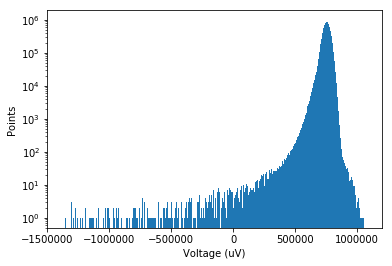

In [34]:
plt.show()